## Naive Bayes Classifier

In [2]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB

In [5]:
#Import training data
mydata = pd.read_csv("C:/Users/DELL/Desktop/Dataset/UpdatedDataset/Iris_data.csv")
mydata

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
96,145,6.7,3.3,5.7,2.5,2
97,146,6.7,3.0,5.2,2.3,2
98,147,6.3,2.5,5.0,1.9,2
99,149,6.2,3.4,5.4,2.3,2


In [3]:
x = mydata.iloc[:, 1:5]
y = mydata.Species

In [4]:
x

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
96,6.7,3.3,5.7,2.5
97,6.7,3.0,5.2,2.3
98,6.3,2.5,5.0,1.9
99,6.2,3.4,5.4,2.3


In [4]:
#Develop/Specify Model
mymodel = GaussianNB()
mymodel

GaussianNB()

In [5]:
#Fit the model
mymodel.fit(x, y)

GaussianNB()

In [6]:
#Accuracy of the model
accuracy=mymodel.score(x,y)
round(accuracy*100,2)

97.03

In [7]:
#Predicted response values
pred = mymodel.predict(x)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [8]:
#Actual Vs Predicted
mytable =pd.crosstab(y, pred)
mytable

col_0,0,1,2
Species,,,
0,34,0,0
1,0,35,1
2,0,2,29


In [9]:
#To check Generalizability
#Import test data (One way of validating the model)
#Import test data
test = pd.read_csv("C:/Users/DELL/Desktop/Dataset/UpdatedDataset/Iris_test.csv")
test.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6,5.4,3.9,1.7,0.4,0
1,8,5.0,3.4,1.5,0.2,0
2,13,4.8,3.0,1.4,0.1,0
3,14,4.3,3.0,1.1,0.1,0
4,19,5.7,3.8,1.7,0.3,0


In [10]:
testx = test.iloc[:, 1:5]
testy = test.Species

In [11]:
#Predicted response for test values
predtest = mymodel.predict(testx)
predtest

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2], dtype=int64)

In [12]:
#Accuracy of the model
test_accuracy=mymodel.score(testx,testy)
round(test_accuracy*100,3)

89.796

In [13]:
#Actual Vs Predicted (Confusion Matrix)
mytesttable =pd.crosstab(testy, predtest)
mytesttable

col_0,0,1,2
Species,,,
0,16,0,0
1,0,10,4
2,0,1,18


In [14]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(testy,predtest)
mat

array([[16,  0,  0],
       [ 0, 10,  4],
       [ 0,  1, 18]], dtype=int64)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(*args, **kw)>

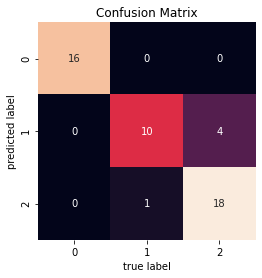

In [19]:
sns.heatmap(mat, square=True, annot=True,cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show

In [27]:
from sklearn.metrics import classification_report

In [28]:
report = classification_report(testy, predtest)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.91      0.71      0.80        14
           2       0.82      0.95      0.88        19

    accuracy                           0.90        49
   macro avg       0.91      0.89      0.89        49
weighted avg       0.90      0.90      0.90        49

